<center>

# Tarea 1 Minor Análisis de Datos

##  IMA-602 Herramientas Básicas Para el Análisis de Datos
##  Profesor Alejandro Ferreira
### Matías Palma Manterola

___


### Pregunta 1


1. Lea la base de datos y a partir de esto, cree un objeto DataFrame de Pandas para almacenarla.


In [1]:
# importamos librería de pandas
import pandas as pd

import numpy as np

# leemos el dataframe con el método .read_csv() en la misma ruta de este cuadernillo
df = pd.read_csv('Auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [2]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [3]:
try:
    df.iloc[:,3].astype(float)
except ValueError:
    print('Valor potencialmente nulo')

Valor potencialmente nulo


In [4]:
# Creemos  valores nulos

df.replace('?', np.NaN, inplace=True)

In [5]:
print('Etiquetas de Clase', np.unique(df['origin']))

Etiquetas de Clase [1 2 3]


In [6]:
df['origin'] = df['origin'].astype('category')
df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object

In [7]:
# Transformemos horsepower a tipo float

df['horsepower']=df.iloc[:,3].astype(float)
df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object

 2. Aplicar el método `.describe()` para obtener las estadísticas descriptivas de las variables.

In [8]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.0,397
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,304
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,6
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,NaN,NaN
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,NaN,NaN
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,NaN,NaN


 3. ¿Cuál es el modelo de automóvil más representado?. ¿Qué número de cilindros (variable cylinders) posee este vehículo?

Según el dataframe, el automóvil más representado es el modelo Ford Pinto.

In [9]:
# indexamos de acuerdo al nombre del auto y posteriormente ubicamos con el método .loc el modelo ford pinto
ford_pinto = df.set_index('name').loc['ford pinto']
ford_pinto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
ford pinto,19.0,4,122.0,85.0,2310,18.5,73,1
ford pinto,26.0,4,122.0,80.0,2451,16.5,74,1
ford pinto,23.0,4,140.0,83.0,2639,17.0,75,1
ford pinto,18.0,6,171.0,97.0,2984,14.5,75,1
ford pinto,26.5,4,140.0,72.0,2565,13.6,76,1


Al analizar en detalle se descubre que existen sub-clasificaciones(por cilindros, caballos de fuerza, año, etc.) de éste modelo; En nuestro caso, si consideramos el número de cilindros, quien más representa al modelo es el automóvil de 4 cilindros con una frecuencia de 5.

In [10]:
len(ford_pinto.set_index('cylinders').loc[4])

5

 4. Considerando solo los automóviles fabricados entre 1973 y 1976, ¿cuál esel valor medio de la variable mpg?.

In [16]:
auto_73_76 = df.set_index('year').loc[73:76]
auto_73_76.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,131.000000,131.000000,131.000000,130.000000,131.000000,131.000000
mean,20.141221,5.778626,212.236641,108.761538,3163.709924,15.522901
std,5.819819,1.697465,105.623120,38.311818,897.847593,2.618766
min,11.000000,3.000000,68.000000,46.000000,1649.000000,9.500000
25%,15.000000,4.000000,115.500000,80.250000,2385.000000,13.550000
50%,19.000000,6.000000,225.000000,100.000000,3085.000000,15.500000
75%,24.750000,8.000000,304.000000,140.000000,3883.500000,17.000000
max,33.000000,8.000000,455.000000,230.000000,4997.000000,22.200000


El valor medio es de aproximadamente $20.141221 [mpg]$

### Pregunta 2

Escoja 4 variables contínuas y combínelas en dos nuevas variables siguiendo los
siguientes pasos:

1. Estadarizar las variables utilizando utilizando la media ($\mu_x$) y la varianza ($\sigma_x$) muestral, de la siguiente forma:

$$ x_{std}^{(i)} = \frac{ x^{ (i) } - \mu_x }{ \sigma_x } $$

con $i=1,2,3,\dots n$, donde $n$ es el número de muestras en la base de datos

In [12]:
X, y = df[['mpg','displacement','weight','acceleration']].values , df['origin']


Aquí $x_1~=~$mpg, $x_2~=~$displacement, $x_3~=~$weight  &  $x_4~=~$acceleration

In [13]:
#importamos estandarizador
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_scaler = std.fit_transform(X)
pd.DataFrame(X_scaler).shape

(397, 4)

2. Cree dos nuevas variables $y_1$ e $y_2$ combinando las cuatro variables contínuas elegidas $x_1, \dots, x_4$ de acuerdo a la siguiente identidad:

$$y_1=2x_1-3x_2$$

$$y_2= 2x_2-\frac{x_3}{2}-\frac{3x_4}{4}$$

In [14]:
Y1 = 2 * X_scaler[:,0] - 3 * X_scaler[:,1]

Y2 = 2 * X_scaler[:,1] - X_scaler[:,2] / 2 - 3 * X_scaler[:,3] / 4

3. Utilice el método `.scatter()` de Matplotlib para mostrar cómo se distribuyen en el plano los puntos $y^n = (y_1^n,y_2^n)$, e identifique con un mismo color los datos que pertenecen a la misma clase.


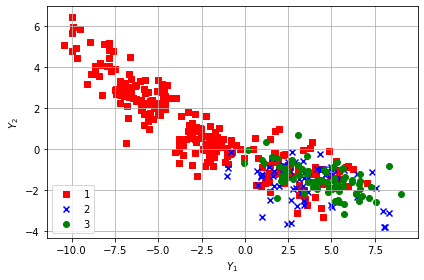

In [15]:
import matplotlib.pyplot as plt

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(Y1[y == l], 
                Y2[y == l], 
                c=c, label=l, marker=m)

plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.grid()
plt.show()